In [35]:
using Ripserer
using Plots
using LinearAlgebra
using CSV
using DataFrames

In [113]:
function read_data(filename)
    grid = Matrix{Float64}(CSV.read(filename, DataFrame) )|> eachrow .|> Tuple
    return grid
end

read_data (generic function with 1 method)

In [114]:
mat2pc(mat::Matrix{Float64}) = mat |> eachcol .|> Tuple

mat2pc (generic function with 1 method)

### Read torus from dataset and compute 1-dimensional PH

In [189]:
M = 5
T = read_data("tori/torus_$M.tsv");

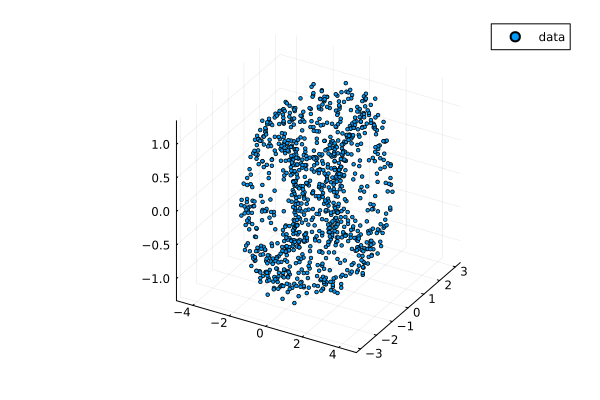

In [190]:
scatter(T; label="data", markersize=2, aspect_ratio=1)

In [191]:
R1 = ripserer(T; dim_max=1, alg=:involuted)

2-element Vector{PersistenceDiagrams.PersistenceDiagram}:
 1000-element 0-dimensional PersistenceDiagram
 312-element 1-dimensional PersistenceDiagram

In [257]:
plot(R1[2])
savefig("PD.svg")

"/Users/agnesebarbensi/PD.svg"

In [193]:
n = length(R1[2]) 
n-1

311

## Look at representative cycles

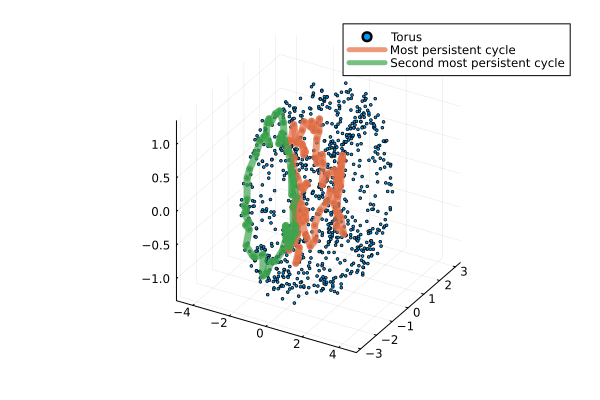

In [253]:
cycle = R1[2][n]
scatter(T; label="Torus", markersize=1.5 )
plot!(cycle, T; label="Most persistent cycle", linewidth=7, alpha = 0.7)
cycle = R1[2][n-1]
plot!(cycle, T; label="Second most persistent cycle", linewidth=7 ,  alpha = 0.7, aspect_ratio=1)
#savefig("torus_2.svg")

In [204]:
representatives(PH, dim::Int) = [[collect(r.simplex) for r in collect(c)] for c in representative.(PH[dim+1])]

representatives (generic function with 1 method)

In [205]:
list_of_cycles = representatives(R1, 1);

In [206]:
N = length(list_of_cycles)

312

## Plot the two most persistent cycles

In [207]:
C = list_of_cycles[N]

89-element Vector{Vector{Int64}}:
 [823, 339]
 [642, 493]
 [906, 401]
 [839, 199]
 [984, 522]
 [683, 229]
 [585, 428]
 [811, 166]
 [727, 490]
 [715, 294]
 [957, 420]
 [633, 420]
 [995, 229]
 ⋮
 [986, 984]
 [901, 113]
 [906, 271]
 [910, 555]
 [986, 682]
 [859, 12]
 [493, 401]
 [910, 901]
 [634, 546]
 [986, 965]
 [768, 537]
 [615, 414]

In [208]:
function return_points(representatives)
    return [Set(i for e in es for i in e) for es in representatives]
end

return_points (generic function with 1 method)

In [209]:
list_of_cycles_points = return_points(list_of_cycles);
C_points = list_of_cycles_points[N]

Set{Int64} with 84 elements:
  794
  910
  784
  823
  420
  966
  965
  665
  980
  363
  86
  863
  422
  242
  682
  199
  12
  715
  356
  615
  901
  776
  849
  537
  339
  ⋮ 

In [210]:
function cycle_points(points, indices)
    indices = collect(indices)
    c = Vector{Tuple{Float64, Float64, Float64}}(undef,length(indices))
    d = Vector{Tuple{Float64, Float64, Float64}}(undef,length(indices))
    for a in 1:length(indices)
        c[a,:] = points[indices[a], :]
    end
    return c
end

cycle_points (generic function with 1 method)

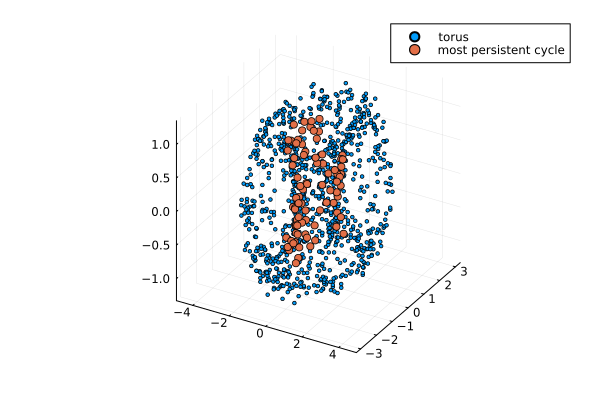

In [211]:
scatter(T; label="torus", markersize=2, aspect_ratio=1)
scatter!(cycle_points(T, C_points); label="most persistent cycle")

In [212]:
D = list_of_cycles[N-1];
D_points = list_of_cycles_points[N-1];

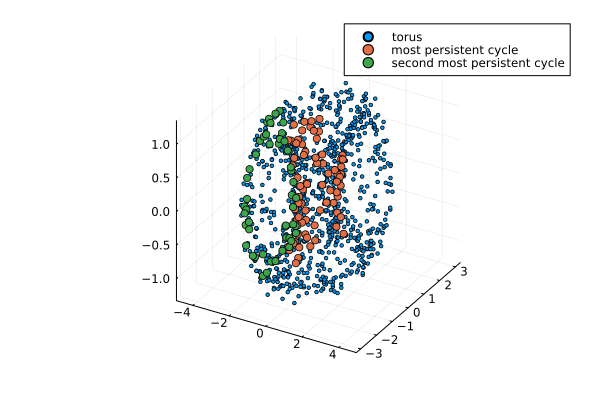

In [213]:
scatter(T; label="torus", markersize=2, aspect_ratio=1)
scatter!(cycle_points(T, C_points); label="most persistent cycle")
scatter!(cycle_points(T, D_points); label="second most persistent cycle")

## See if two most persistent cycles share vertices

In [131]:
intersect(Set(C), Set(D))

Set{Vector{Int64}}()

In [132]:
intersect(C_points, D_points)

Set{Int64} with 2 elements:
  856
  828

In [133]:
length(intersect(C_points, D_points))

2

## Check intersection between the two most persistent cycles for 500 noisy tori

In [134]:
x = Vector{Float64}();

for i in 0:499
    T = read_data("tori/torus_$i.tsv");
    R1 = ripserer(T; dim_max=1, alg=:involuted);
    repre = return_points(representatives(R1, 1));
    N = length(repre);
    inter = length(intersect(repre[N], repre[N-1]));
    append!(x, inter);

end

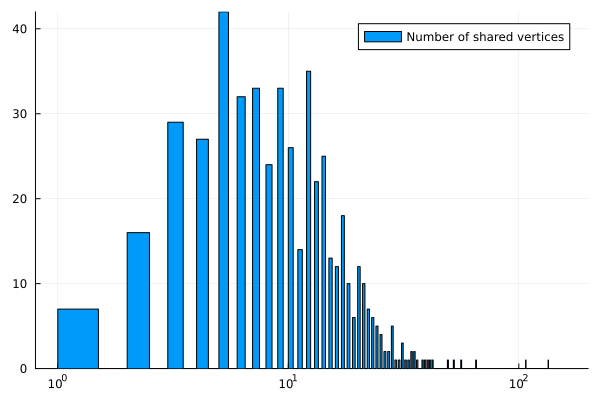

In [255]:
histogram(x, bins=500, xaxis=(:log10, (0.8, 200)), yscale=:identity, label="Number of shared vertices", legend=:topright)
#savefig("histo.svg")

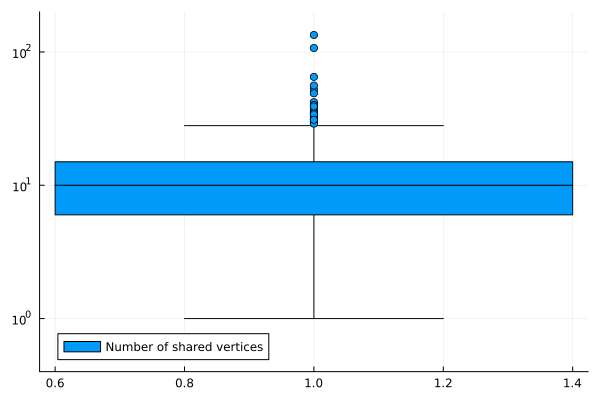

In [248]:
using StatsPlots
boxplot(x, yaxis=(:log10, (0.4, 200)),label="Number of shared vertices", legend=:bottomleft )


## The cycles always intersect

In [228]:
minimum(x), maximum(x)

(1.0, 134.0)

In [229]:
x

500-element Vector{Float64}:
 19.0
  8.0
  2.0
  5.0
  9.0
  8.0
  3.0
 19.0
  6.0
  7.0
  7.0
  9.0
  4.0
  ⋮
  5.0
 24.0
 17.0
  3.0
 13.0
  1.0
 12.0
  5.0
 12.0
  8.0
  6.0
  9.0